In [1]:
import pandas as pd 
import geopandas as gpd
import urllib
import shapely
pd.options.mode.chained_assignment = None  # default='warn'
from math import *

In [24]:
import osmnx as ox
import networkx as nx

In [3]:
def create_graph(loc, dist, transport_mode, loc_type="address"):
###Transport mode = ‘walk’, ‘bike’, ‘drive’, ‘drive_service’, ‘all’, ‘all_private’, ‘none’
    if loc_type == "address":
        G = ox.graph_from_address(loc, dist=dist, network_type=transport_mode)
    elif loc_type == "points":
        G = ox.graph_from_point(loc, dist=dist, network_type=transport_mode )
    return G

In [4]:
G = create_graph("Ile de France", 50000, "drive")


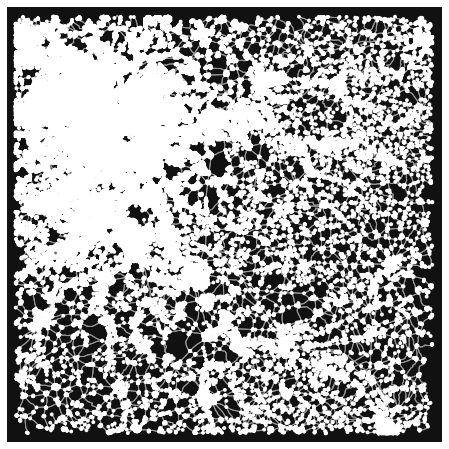

(<Figure size 576x576 with 1 Axes>, <AxesSubplot: >)

In [5]:
ox.plot_graph(G)

In [6]:
G = ox.add_edge_speeds(G) #Impute
G = ox.add_edge_travel_times(G)
G = ox.distance.add_edge_lengths(G) 

In [19]:
i = 0
for noeud, info in G.adj.items():
    for voisin, info_lien in info.items():
        if i < 2: 
            print(f"Le lien entre {noeud} et {voisin} a pour poids {info_lien}")
            print(type(info_lien))
            i += 1

Le lien entre 360930 et 480690113 a pour poids {0: {'osmid': 84416296, 'lanes': '3', 'name': 'Rue de Tolbiac', 'highway': 'secondary', 'maxspeed': '30', 'oneway': False, 'reversed': False, 'length': 154.085, 'geometry': <shapely.geometry.linestring.LineString object at 0x7fa4d2ee2c70>, 'speed_kph': 30.0, 'travel_time': 18.5}}
<class 'networkx.classes.coreviews.AtlasView'>
Le lien entre 360930 et 361704 a pour poids {0: {'osmid': 84416296, 'lanes': '3', 'name': 'Rue de Tolbiac', 'highway': 'secondary', 'maxspeed': '30', 'oneway': False, 'reversed': True, 'length': 114.307, 'geometry': <shapely.geometry.linestring.LineString object at 0x7fa4d2ee2c40>, 'speed_kph': 30.0, 'travel_time': 13.7}}
<class 'networkx.classes.coreviews.AtlasView'>


In [7]:
def itinéraire(position, station):
    a,b = position
    x,y = station
    start_node = ox.nearest_nodes(G, a,b)
    end_node = ox.nearest_nodes(G, x,y) # Calculate the shortest path
    route = nx.shortest_path(G, start_node, end_node, weight='length') #Plot the route and street networks
    length = nx.shortest_path_length(G, source=start_node, target=end_node, weight='length', method="dijkstra")
    return(route, length)

In [57]:
import module_projet as md

def x_plus_proche(data, position , carb, nbr_stations):
    data_mask = data['Nom Officiel Région']=='Île-de-France'
    data_1 = data[data_mask]
    data_2 = md.data_carb(data_1, carb, ['adresse', 'ville', 'prix_valeur', 'prix_nom', 'geom'])
    pos = list(map(float,md.Adresse_to_gps2(position).split(',')))
    def iti(station):
        pos_sta = list(map(float, station.split(',')))
        return(itinéraire(pos, pos_sta)[1])
    vector = data_2['geom'].apply(iti).sort_values().head(nbr_stations)
    return(vector)


In [48]:
dat_inst = pd.read_csv('data/fichier_inst.csv', sep= ';')

In [50]:
data_mask = dat_inst['Nom Officiel Région']=='Île-de-France'
data_1 = dat_inst[data_mask]
data_2 = md.data_carb(data_1, 'Gazole' , ['adresse', 'ville', 'prix_valeur', 'prix_nom', 'geom'])

In [52]:
data_2

,adresse,ville,prix_valeur,prix_nom,geom
32,7 Avenue Pierre Brossolette,Chilly-Mazarin,1.778,Gazole,"48.701,2.319"
33,55 BLD DE PICPUS,PARIS,1.818,Gazole,"48.846,2.401"
46,9 Boulevard du Bel Air,Franconville,1.801,Gazole,"48.986,2.238"
64,AUTOROUTE A6 - AIRE DE VILLABÉ,VILLABE,1.814,Gazole,"48.594,2.444"
120,Autoroute du Soleil - AIRE DE NEMOURS OUEST,NEMOURS,1.910,Gazole,"48.261701654868,2.7220366668700997"
...,...,...,...,...,...
9855,Rue de la gare,MAROLLES-EN-HUREPOIX,1.799,Gazole,"48.56445,2.29216"
9886,44-50 BD DE VALMY,COLOMBES,1.929,Gazole,"48.926,2.253"
9912,29 Avenue du Général Leclerc,SEVRAN,1.959,Gazole,"48.939,2.527"
9968,"N191, Boulevard Charles de Gaulle",Mennecy,1.929,Gazole,"48.566,2.442"


In [58]:
x_plus_proche(dat_inst, "1 rue d'Arsonval, Orsay, France", 'Gazole', 10)

AttributeError: module 'module_projet' has no attribute 'Adresse_to_gps2'

In [40]:
from geopy.geocoders import Nominatim


def Adresse_to_gps(Adresse) : 

    geolocator = Nominatim(user_agent="Projet Python")
    location = geolocator.geocode(Adresse)
    return str(str(location.latitude) + ','+ str(location.longitude))


Adresse_to_gps("1 rue d'Arsonval, Orsay, France")

'48.7087952,2.1742033'

In [ ]:
print(Adresse_to_gps("1 rue de Rivoli, Paris, France"), Adresse_to_gps("63 rue du Ruisseau, Paris, France"))


In [21]:
start = (2.3592784,48.8555424)
end = (2.340438,48.8941015)
end2 = (2.378077,48.856340)
end3 =  (2.376176,48.864692)

route, longueur = itinéraire(start, end)
route2, longueur2 = itinéraire(start, end3)
print(longueur, longueur2)


6020.0109999999995 2813.437


In [ ]:
G_bien = create_graph("France", 100000, "drive")

In [ ]:
data_g = gpd.read_file('data/prix-carburants-fichier-quotidien-test-ods.geojson')

In [ ]:
data_g.columns

In [ ]:
data_g.columns

In [ ]:
def data_carb_g(df, carb):
    data_1 = df[['adresse', 'ville', 'prix_valeur', 'prix_nom', 'geometry']]
    d = data_1[data_1.prix_nom == carb]
    d.drop_duplicates(keep = 'first', inplace=True) 
    #df.drop_duplicates(subset ="'column'", keep = 'first', inplace=True) si on veut supprimer selon une colonne
    return d

In [ ]:
data_2_g = data_carb_g(data_g, 'SP95').sort_values('prix_valeur')

In [ ]:
data_2_g

In [ ]:
data_2_g.loc[58312, 'geometry']

In [ ]:
data_2_g.crs

In [ ]:
from geopy.geocoders import Nominatim


def Adresse_to_gps(Adresse) : 

    geolocator = Nominatim(user_agent="Projet Python")
    location = geolocator.geocode(Adresse)
    return location.latitude, location.longitude


Adresse_to_gps("1 rue d'Arsonval, Orsay, France")

In [ ]:
point = shapely.geometry.Point(Adresse_to_gps("1 rue d'Arsonval, Orsay, France"))
col_adresse = gpd.GeoSeries((point for i in range(len(data_2_g))),index= data_2_g.index, crs = 4326)

In [ ]:
col_adresse.crs

In [ ]:
data_2_g.distance(col_adresse)

In [ ]:
import osmnx as ox
import networkx as nx

def create_graph(loc, dist, transport_mode, loc_type="address"):
###Transport mode = ‘walk’, ‘bike’, ‘drive’, ‘drive_service’, ‘all’, ‘all_private’, ‘none’
    if loc_type == "address":
        G = ox.graph_from_address(loc, dist=dist, network_type=transport_mode)
    elif loc_type == "points":
        G = ox.graph_from_point(loc, dist=dist, network_type=transport_mode )
    return G

G = create_graph("Ile de France", 50000, "drive")

G = ox.add_edge_speeds(G) #Impute
G = ox.add_edge_travel_times(G)
G = ox.distance.add_edge_lengths(G) 

def itinéraire(position, station): #attention il faut mettre (longitude, latitude)
    a,b = position
    x,y = station
    start_node = ox.nearest_nodes(G, a,b)
    end_node = ox.nearest_nodes(G, x,y) # Calculate the shortest path
    route = nx.shortest_path(G, start_node, end_node, weight='length') #Plot the route and street networks
    length = nx.shortest_path_length(G, source=start_node, target=end_node, weight='length', method="dijkstra")
    return(route, length)

def x_plus_proche(data, position, carb, nbr_stations):
    data_1 = md.data_carb(data, carb, ['adresse', 'ville', 'prix_valeur', 'prix_nom', 'geom'])
    pos = list(map(float,md.Adresse_to_gps(position).split(',')))
    def iti(station):
        pos_sta = list(map(float, station.split(',')))
        return(itinéraire(pos, pos_sta)[1])
    vector = data_1['geom'].apply(iti).sort_values().head(nbr_stations)
    return(vector)
